# Практическое занятие №1

## Генерация случайных чисел и последовательностей

Подключаем необходимые либы

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Генерируем нормальное распределение

In [20]:
mu, sigma = 0, 1 # mean and standard deviation
size = 10000
normal_distribution = np.random.normal(mu, sigma, size)

In [23]:
print(normal_distribution)

[ 0.25448714  0.09240131 -0.96140869 ...  0.09994138 -1.79089054
  0.11314949]


Проверим, что оно получилось с нужными нам параметрами

In [24]:
# check mu
print(abs(mu - np.mean(normal_distribution)))

# check sigma
print(abs(sigma - np.std(normal_distribution)))

0.0029207702858391363
0.007236535737407568


Построим гистограмму

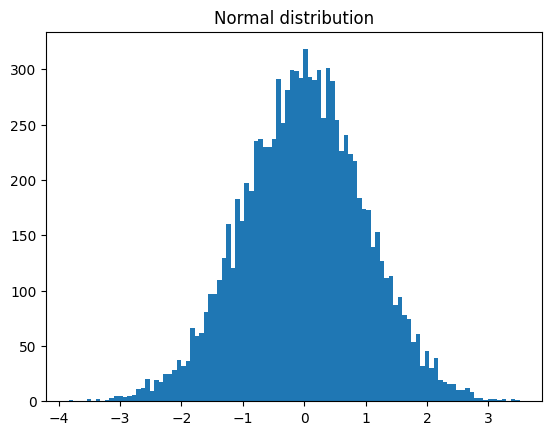

In [28]:
plt.hist(normal_distribution, 100)
plt.title('Normal distribution')
plt.show()

Генерируем равномерное распределение

In [48]:
low = 0.0
high = 1.0
uniform_distribution = np.random.uniform(size=size, low=low, high=high)

Проверяем параметры, чему они будут равны?

https://www.statology.org/uniform-distribution/

In [7]:
print(np.mean(uniform_distribution))

print(np.std(uniform_distribution))

0.5002210480489863
0.2868173917842574


Строим гистограмму, чтобы проверить

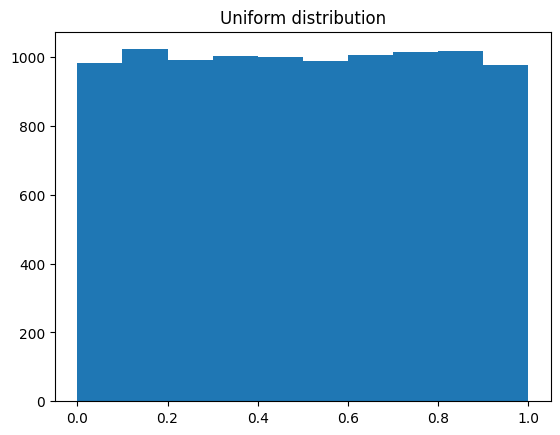

In [49]:
plt.hist(uniform_distribution, 10)
plt.title('Uniform distribution')
plt.show()

Теперь проверим наши распределения при помощи теста Колмогорова-Смирнова

In [51]:
from scipy import stats

In [53]:
result = stats.ks_2samp(normal_distribution, uniform_distribution)
pthr = 0.05
print(result.pvalue)
print(result.pvalue > pthr)

0.0
False


После чего проверим их с "эталонными"

In [59]:
ks_uniform = stats.uniform.rvs(size=size)

result = stats.ks_2samp(uniform_distribution, ks_uniform)

print(result.pvalue)
print(result.pvalue > pthr)

0.14028451762374075
True


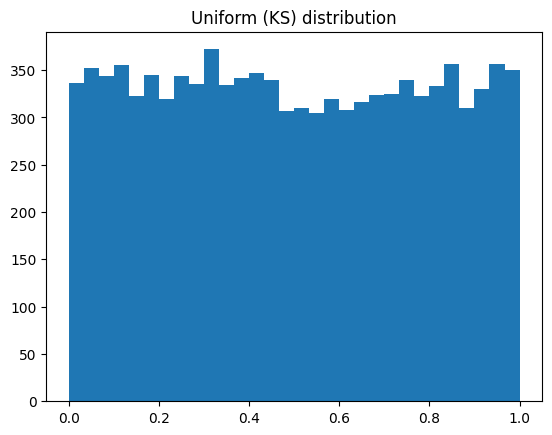

In [63]:
plt.hist(ks_uniform, 30)
plt.title('Uniform (KS) distribution')
plt.show()

Проверить тоже самое для нормального, будет ли работать и как исправить?

In [64]:
ks_norm = stats.norm.rvs(size=size)

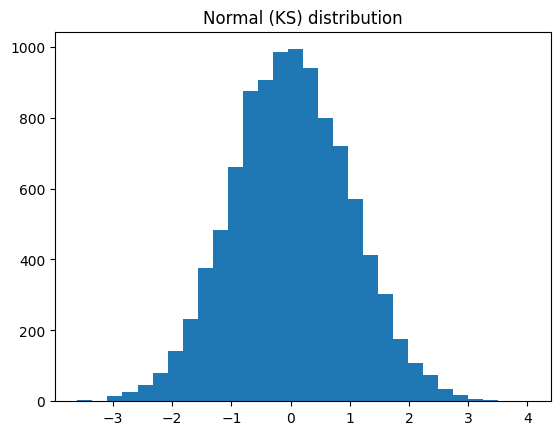

In [65]:
plt.hist(ks_norm, 30)
plt.title('Normal (KS) distribution')
plt.show()

In [17]:
print(f'mu = {np.mean(ks_norm)}')
print(f'std = {np.std(ks_norm)}')

mu = 0.012046233122926056
std = 1.007258475688612


In [66]:
result = stats.ks_2samp(normal_distribution, ks_norm)
 
print(result.pvalue)
print(result.pvalue > pthr)

0.41538042565668437
True


[Линейный конгруэнтный генератор](https://www.geeksforgeeks.org/linear-congruence-method-for-generating-pseudo-random-numbers/)

Какое распределение получаем, посмотреть, построить

In [73]:
from time import time

In [82]:
# Initialize
now = time()
print(int(now))
seed_num = now
multiplier = 5**5
increment = 0
modulus = (2**26)
unit = 10000

lcg = []

num_base = seed_num
for i in range(unit):
    rd = (multiplier * num_base + increment) % modulus
    lcg.append(rd)
    num_base = rd

lcg = lcg / np.max(lcg)


1710511014


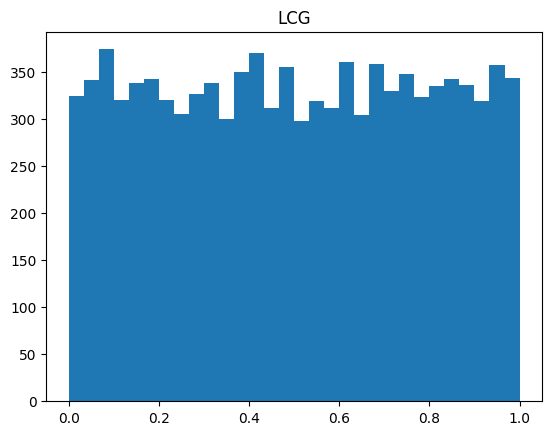

In [83]:
plt.hist(lcg, 30)
plt.title('LCG')
plt.show()

Теперь попробуем текущие распределение превратить в нормальное

Для этого будем использовать преобразование Бокса-Мюллера

In [ ]:
R = np.sqrt(-2 * np.log(lcg))
Theta = 2 * np.pi * lcg
Nm = R * np.cos(Theta)

И точно также, в экспоненциальное

In [ ]:
lmbd = 0.4
Em = (-1/lmbd)*np.log(lcg)

## Работа с изображениями

Считаем изображение и попробуем его отобразить

In [84]:
import cv2

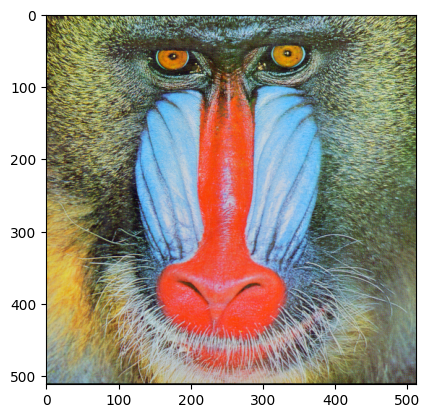

In [85]:
img = cv2.imread('Mandrill.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# cv2.imshow('img', img)
plt.imshow(img)

In [86]:
print(img.shape)

(512, 512, 3)


Дальше работать будем с серым (одноканальным) изображением

Точнее, будем проверять 3-канальное ли изображение и конвертировать его

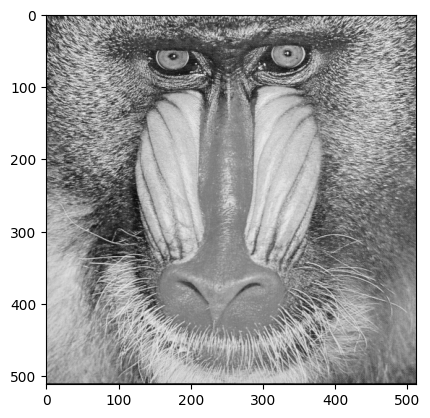

In [87]:
if len(img.shape) > 2:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img, cmap='gray')
# cv2.imwrite('img.png', img)

Построим также гистограмму распределения яркости на изображении

In [89]:
512*512

262144

In [90]:
rimg = img.ravel()
rimg.shape

(262144,)

In [91]:
print(np.mean(rimg))

129.61581802368164


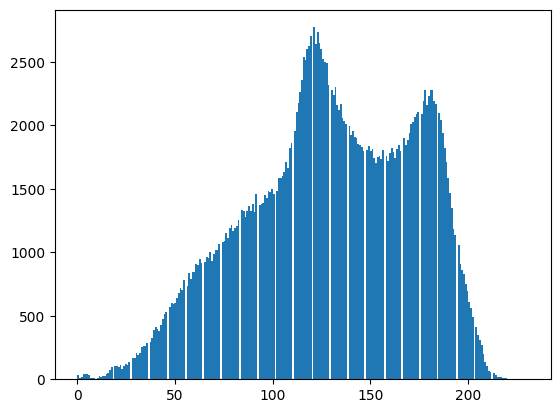

In [88]:
plt.hist(img.ravel(), 256)
plt.show()

Теперь добавим шума

Сначала Гауссов (нормальный)

In [92]:
gaussian_noise = np.zeros(img.shape,dtype=np.uint8)

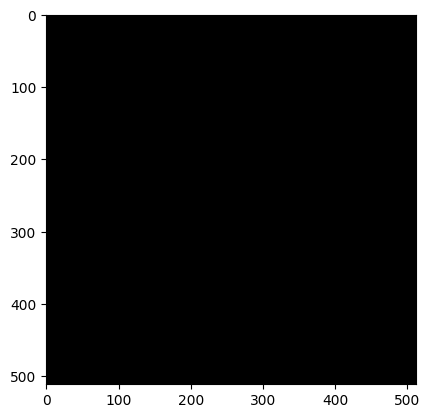

In [93]:
plt.imshow(gaussian_noise, cmap='gray')

In [121]:
cv2.randn(gaussian_noise,0,5)
gaussian_noise = (gaussian_noise).astype(np.uint8)

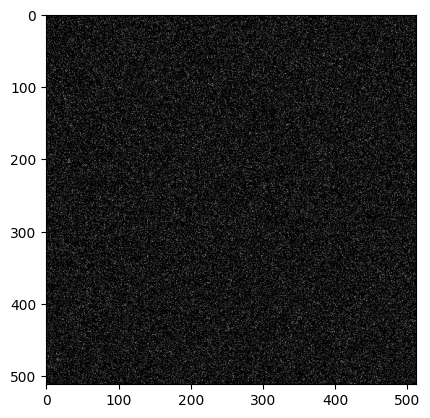

In [122]:
plt.imshow(gaussian_noise, cmap='gray')

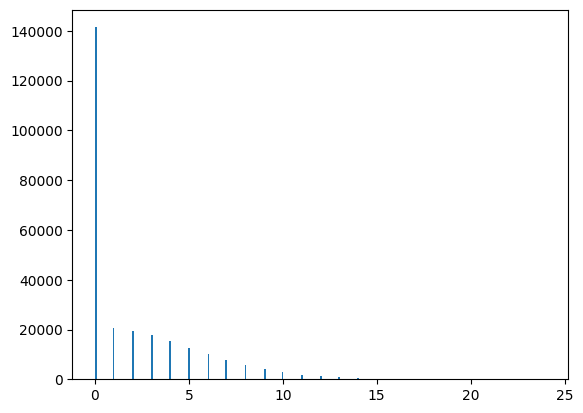

In [123]:
plt.hist(gaussian_noise.ravel(), 256)
plt.show()

In [124]:
gaussian_noise_img = cv2.subtract(img, gaussian_noise)

Посмотрим что, из себя представляет шум, и как выглядит зашумленное изображение и его гистограмма

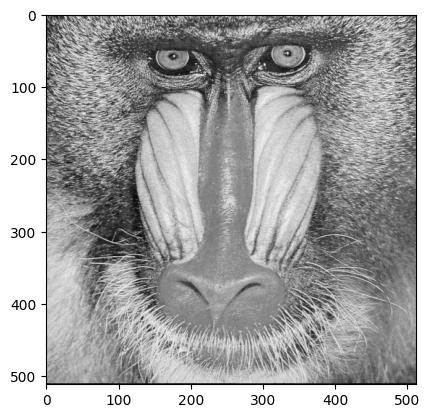

In [125]:
plt.imshow(gaussian_noise_img, cmap='gray')

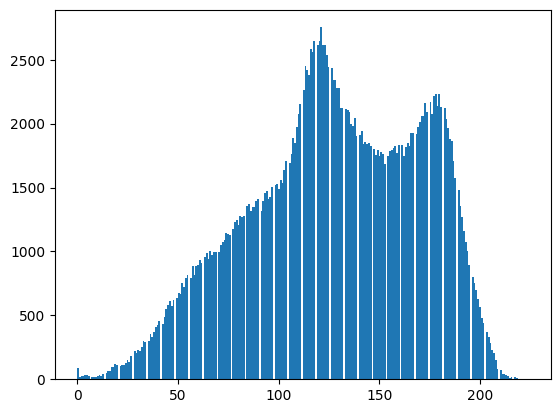

In [126]:
plt.hist(gaussian_noise_img.ravel(), 256)
plt.show()

Посчитаем [отношение Сигнал-Шум](https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D0%BA%D0%BE%D0%B2%D0%BE%D0%B5_%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%B0_%D0%BA_%D1%88%D1%83%D0%BC%D1%83)

In [127]:
mse = np.mean((img - gaussian_noise_img) ** 2)
max_pixel = 255.0
psnr = 20 * np.log10(max_pixel/ np.sqrt(mse))
print(f'psnr = {psnr}')

psnr = 37.258757282512555


Теперь попробуем добавить этот же Гауссов шум другим способом, как мы делали раньше

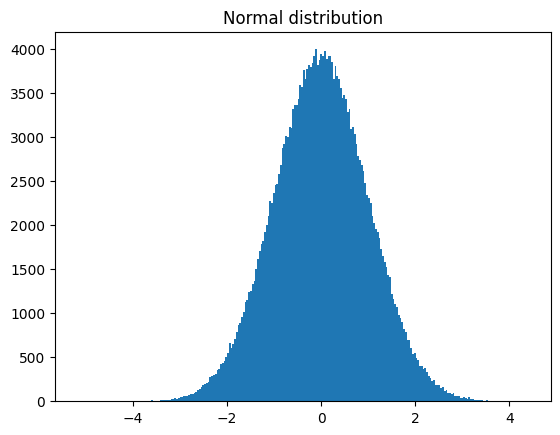

In [135]:
normal_distribution = np.random.normal(0, 1, (img.shape))

plt.hist(normal_distribution.ravel(), 256)
plt.title('Normal distribution')
plt.show()

# normal_distribution_img = img + normal_distribution.astype(np.uint8)

# plt.imshow(normal_distribution_img, cmap='gray')


Добавим шум не только аддитивно, но мультипликативно

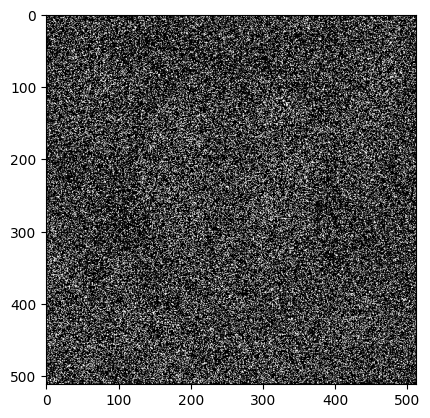

In [136]:
normal_distribution_img = cv2.multiply(img, normal_distribution.astype(np.uint8))

plt.imshow(normal_distribution_img, cmap='gray')

Затем, проделаем тоже самое с другими шумами (равномерным и экспоненциальным)

И пытаемся добавить импульсный шум (он же salt-and-pepper)

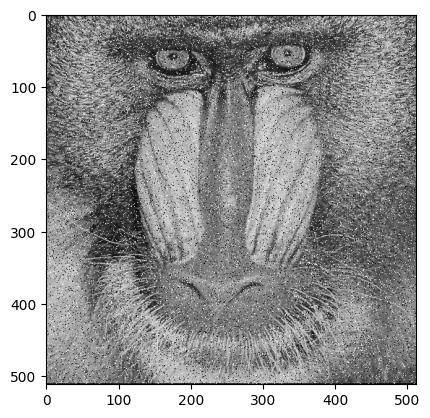

In [153]:
noise_density = 10 # процент зашумления

sp_img = img.copy()

for _ in range(round((noise_density * img.shape[0] * img.shape[1])/ 100)):
    x = np.random.randint(img.shape[1])
    y = np.random.randint(img.shape[0])

    sp_img[x, y] = (np.random.uniform(0, 1) > 0.5) * 255

plt.imshow(sp_img, cmap='gray')

In [152]:
mse = np.mean((img - sp_img) ** 2)
max_pixel = 255.0
psnr = 20 * np.log10(max_pixel/ np.sqrt(mse))
print(f'psnr = {psnr}')

psnr = 48.139045232620035
